## <b>POWER TRANFOMER</b>
Continued of the function transformer

<u><b>Some power transfomers are:</b></u>
* Box-Cox transformer
* Yeo-Jhonson transfomer

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

### 1. Box-cox transformer
$$
x_i^{(\lambda)} = 
    \begin{cases}
        \frac{x_i^{\lambda} - 1}{\lambda} & \text{if } \lambda \neq 0 \\
        \ln(x_i) & \text{if } \lambda = 0
    \end{cases}
$$
Here $\lambda$ varies from -5 to 5 and in the process of seraching we examine all the values of $\lambda$. Finally we choose the optimal value of the lambda. To examine the value of the $\lambda$ we use maximum likeklihood estimation.

### 2. Yeo-Jhonson Transform
$$
x_i^{(\lambda)}=
    \begin{cases}
        [(x_i+1)^{\lambda}-1]/\lambda & \text{if} \lambda \neq 0, x_i\geq 0 \\
        \ln(x_i)+1 & \text{if} \lambda=0, x_i\geq 0\\
        -[(-x_i+1)^{2-\lambda}-1]/(2-\lambda) & \text{if} \lambda \neq 2, x_i<0\\
        -\ln{(-x_i+1)} & \text{if} \lambda =2, x_i<0
    \end{cases}
$$
This is the adjustment to the box-cox transformation to use for the negetive value of the x.

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [10]:
data=pd.read_csv('data/insurance.csv')

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
X=data.drop(columns=['charges'])

In [16]:
Y=data['charges']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [18]:
x_train.head()

,age,sex,bmi,children,smoker,region
1204,18,female,27.28,3,yes,southeast
829,39,male,21.85,1,no,northwest
1077,21,male,26.03,0,no,northeast
416,52,male,34.10,0,no,southeast
1295,20,male,22.00,1,no,southwest


In [29]:
def plotter(col_name):
    plt.figure(figsize=(5,4))
    plt.subplot(121)
    sns.kdeplot(data=data,x=col_name)
    plt.title('kde plot')
    
    plt.subplot(122)
    stats.probplot(data[col_name],dist='norm',plot=plt)
    plt.title('q-q plot')
    
    plt.suptitle(f'{col_name} plotting')
    plt.tight_layout()
    plt.show()
    


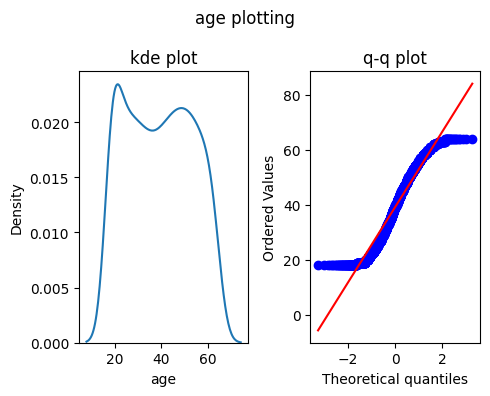

In [30]:
plotter('age')

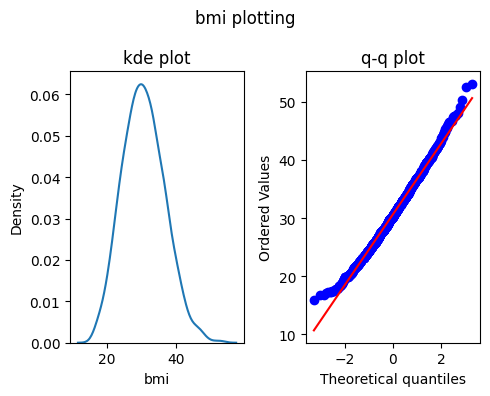

In [31]:
plotter('bmi')

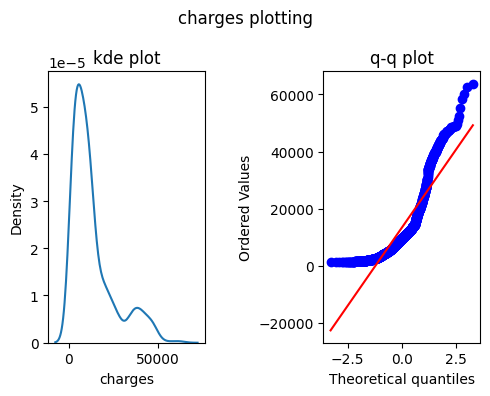

In [32]:
plotter('charges')